In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


在使用机器学习解决现实问题时，人们总是希望使自己的模型尽可能**准确地**描述数据背后的“真实”规律。也就说，偏差小、误差小。在领域中，排除人为失误，人们一般会遇到三种误差来源：随机误差、偏差和方差。偏差和方差又与「欠拟合」及「过拟合」紧紧联系在一起。

> “准确”，有着两层意思，一是“准”，没有偏差，或偏差要小，二是“确”，即是确定，没有变化，或变化要小。
> 天下没有免费的午餐，现实中，达到“准确”是一件非常复杂且困难的事情，常常，要在“准”和“确”之间折中保持，维持其“平衡”。



假如，在数学上为了讨论方便，我们认为索要学习的真实规律就是函数$f$，在$X$条件下观察到样本值$y$
$$Y = f(X) + \varepsilon$$

随机误差$\varepsilon$是由数据本身的噪音带来的，这种误差是不可避免的，不妨认该随机误差服从高斯分布 $\varepsilon \sim \mathcal N(0, \sigma_\varepsilon)$。


通过对真实"规律"函数$f$学习，用观测数据$(Y, X)$训练模型，训练的结果是模型$\hat f$。预测值$\hat f(X)$是我们基于模型$\hat f$在$X$条件下对$Y$的预测。这里需要注意，由于训练模型的数据来自抽样$X$或者模型学习算法借助随机等因素，我们常常学习得到的模型$\hat f$并不是“确定”的。


因此，我们引入“偏差”和“方差”描述模型的这种不确定性：
* 模型的偏差（bias）描述的是通过学习拟合出来的结果之期望，与真实规律之间的差距，记作
$$\text{Bias}(X) = E[\hat f(X)] - f(X)$$
* 模型的方差（variance）即是统计学中的定义，描述的是通过学习拟合出来的结果自身的不稳定性，记作
$$
\text{Var}(X) = E\Bigl[\bigl(\hat f(X) - E[\hat f(X)]\bigr)^{2}\Bigr]
$$

例如，我们使用线性回归模型对$f$进行建模，拟合得到$\hat{f}$，在点$(x)$的模型预测的错误平方期望

$$
\begin{aligned}
Err(x) &= E\left[(Y - \hat{f}(x))^2\right] \\
&= \left(E[\hat{f}(x)]-f(x)\right)^2 + E\left[\left(\hat{f}(x)-E[\hat{f}(x)]\right)^2\right] +\sigma_\varepsilon^2 \\
&= \mathrm{偏差}^2 + \mathrm{方差} + \mathrm{随机误差}
\end{aligned}
$$

也就说，预测的错误来源于三个：偏差、方差和随机误差。随机误差由数据噪音或其它非模型因素导致，对于模型预测某个点$x$来说，这个随机误差属于不可消(irreducible)的错误。除此之外，对于模型偏差和方差，通过选择合适模型、调参，我们是可以不断减小两者的。

如果将机器学习任务描述为一个「打靶」的活动：根据相同算法、不同数据集训练出的模型，对同一个样本进行预测；每个模型作出的预测相当于是一次打靶。

<center><table width="80%" style="font-size: 1em" >
<tr style="background-color: white">
    <td >
    偏差小而方差大。
    <p>靶上的落点都分布集中在红心周围，它们的期望落在红心之内，因此偏差较小。落点虽然集中在红心周围，但是比较分散，这是方差大的表现。</p>
    </td>
    <td rowspan="2" width="40%">
        <center>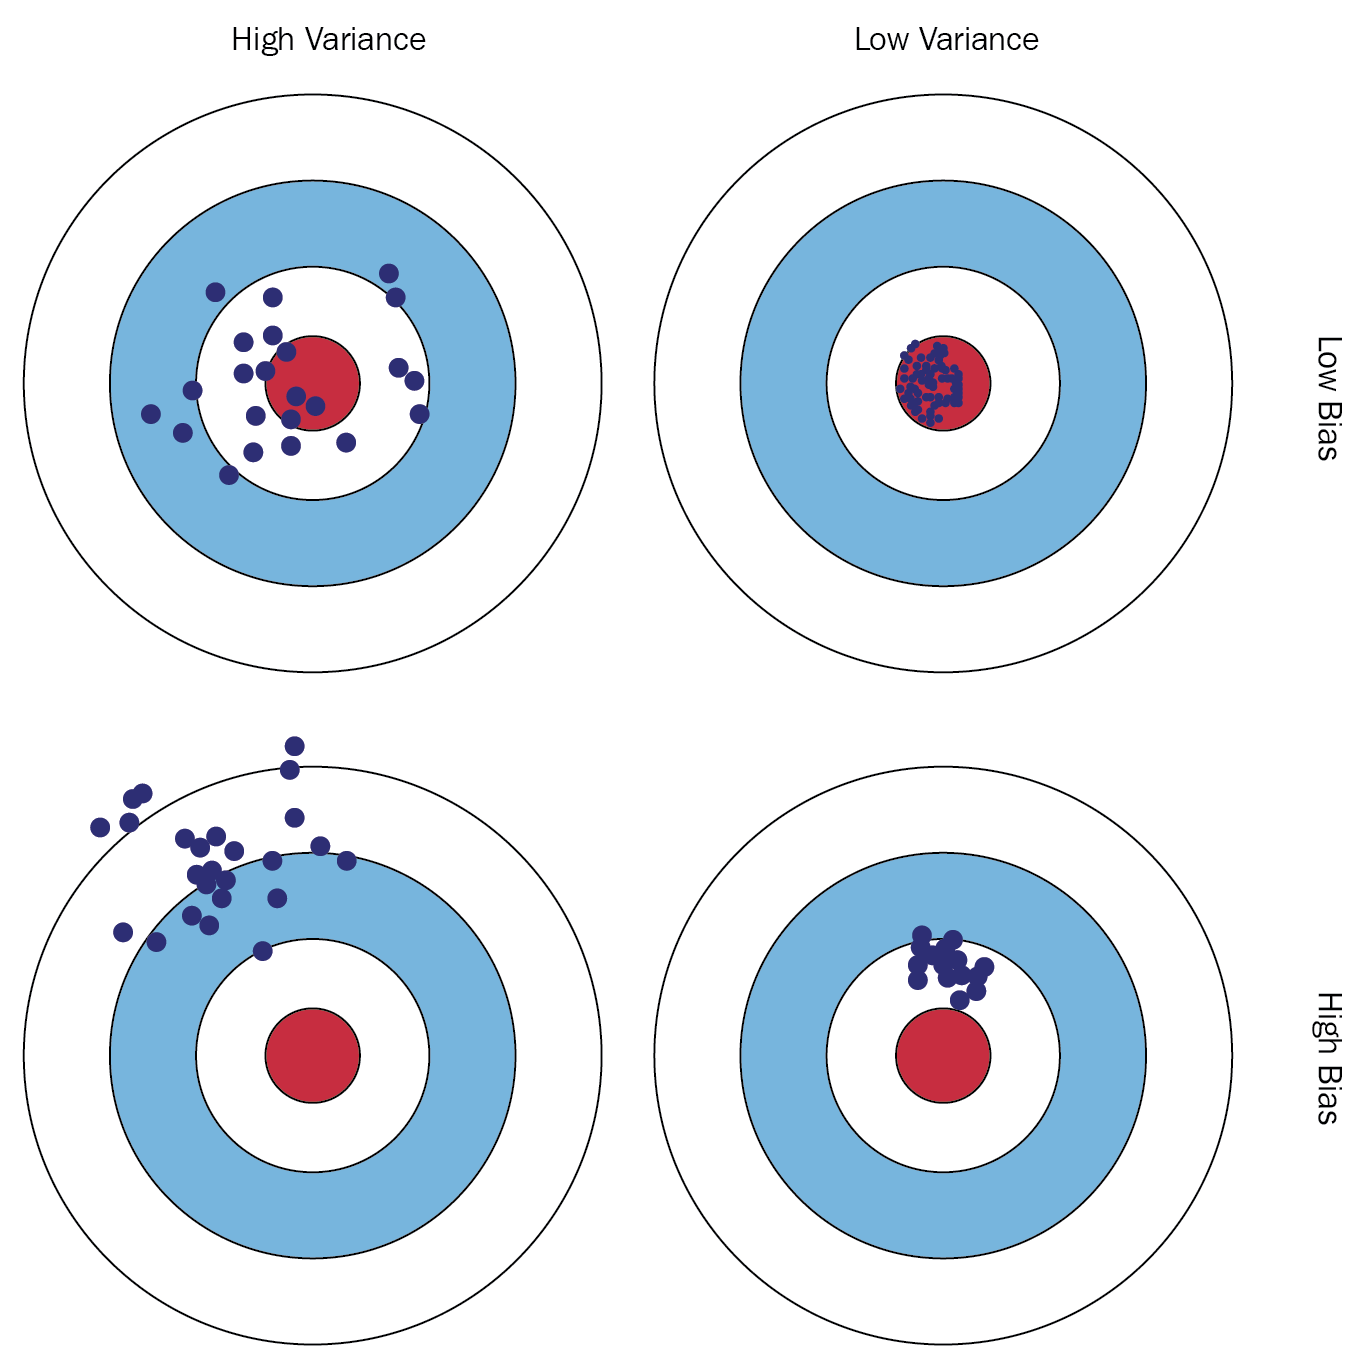</center>
    </td>
    <td>
    这是理想状况：偏差和方差都非常小。
    <p>如果有无穷的训练数据，以及完美的模型算法，我们是有办法达成这样的情况的。然而，在现实的工程问题中，通常数据量是有限的，而模型也是不完美的。</p>
    </td>
</tr>
<tr style="background-color: white">
    <td>这是最糟糕的情况，偏差和方差都大。
    </td>
    <td>偏差大而方差小。靶上的落点非常集中，说明方差小。但是落点集中的位置距离红心较远，这是偏差大的表现。
    </td>
</tr>
</table></center>



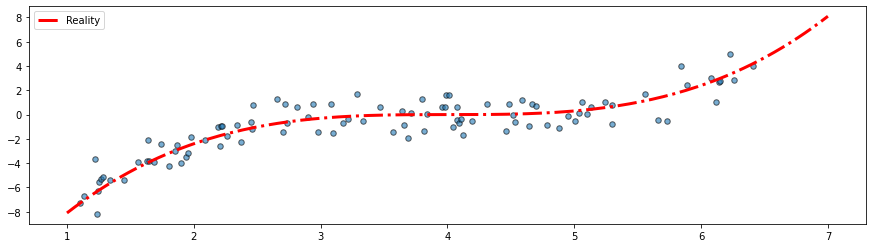

In [2]:
from sklearn.model_selection import train_test_split

f = lambda x: x*np.sin(x)
f = lambda x: 0.3*(x-4)**3

rng = np.random.RandomState(100)

X = np.linspace(1, 6.5, 1000)
# X = X[(X > 4) | (X < 2.5)]
rng.shuffle(X)
X = np.sort(X[:100])
X = X.reshape(-1, 1)
y = f(X).ravel() + rng.normal(0, 1, size=X.shape[0])


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

xx = np.linspace(1, 7, num=200)
plt.figure(figsize=(15, 4))
plt.plot(xx, f(xx), c="red", ls="-.", lw=3, label="Reality")
plt.scatter(X, y, alpha=0.6, ec="k", s=30)
plt.legend();

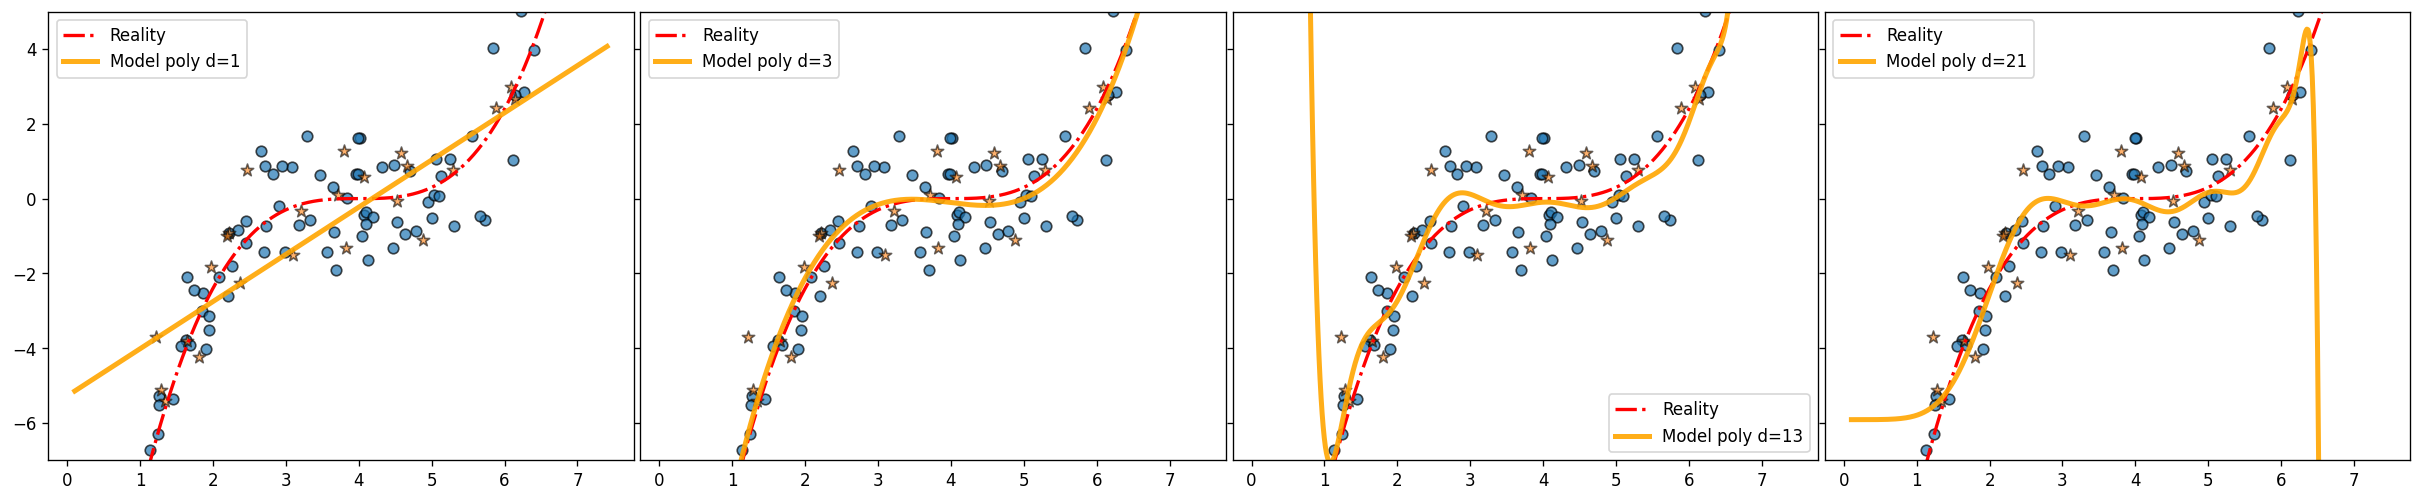

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

models = []
model_labels = []
model_degrees = [1, 3, 13, 21]

for degree in model_degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    X_poly = X_train
    model.fit(X_train, y_train)
    models.append(model)
    model_labels.append(f"Model poly d={degree}")

def plot_regression_line(model, X, y, label=None, eps=0.5, ax=None):
    xx = np.linspace(X.min() - eps, X.max() + eps, num=500).reshape(-1, 1)
    ax.plot(xx, f(xx), c="red", ls="-.", lw=2, label="Reality")
    ax.scatter(X_train, y_train, alpha=0.7, ec="k", s=40)
    ax.scatter(X_test, y_test, alpha=0.6, ec="k", marker="*", s=60)

    pred_y = model.predict(xx)
    ax.plot(xx, pred_y, label=label, c="orange", lw=3, alpha=0.9)
    ax.legend(ncol=1)

fig, axes = plt.subplots(1, len(model_degrees), figsize=(20, 4), dpi=120, sharey=True)
for i in range(len(models)):
    plot_regression_line(models[i], X, y, label=model_labels[i], eps=1, ax=axes[i])

plt.ylim(-7, 5)
plt.tight_layout(pad=0.05);

* **过拟合（overfitting）** 模型复杂度过高，导致模型学习和表达能力太强而过于“灵活”，即模型泛化能力不足。
* **欠拟合（underfitting）** 模型复杂度过低，导致模型学习和表达能力不足，无法学习表述数据相对复杂关系。

* 模型越复杂，模型对训练集数据的拟合度也越高

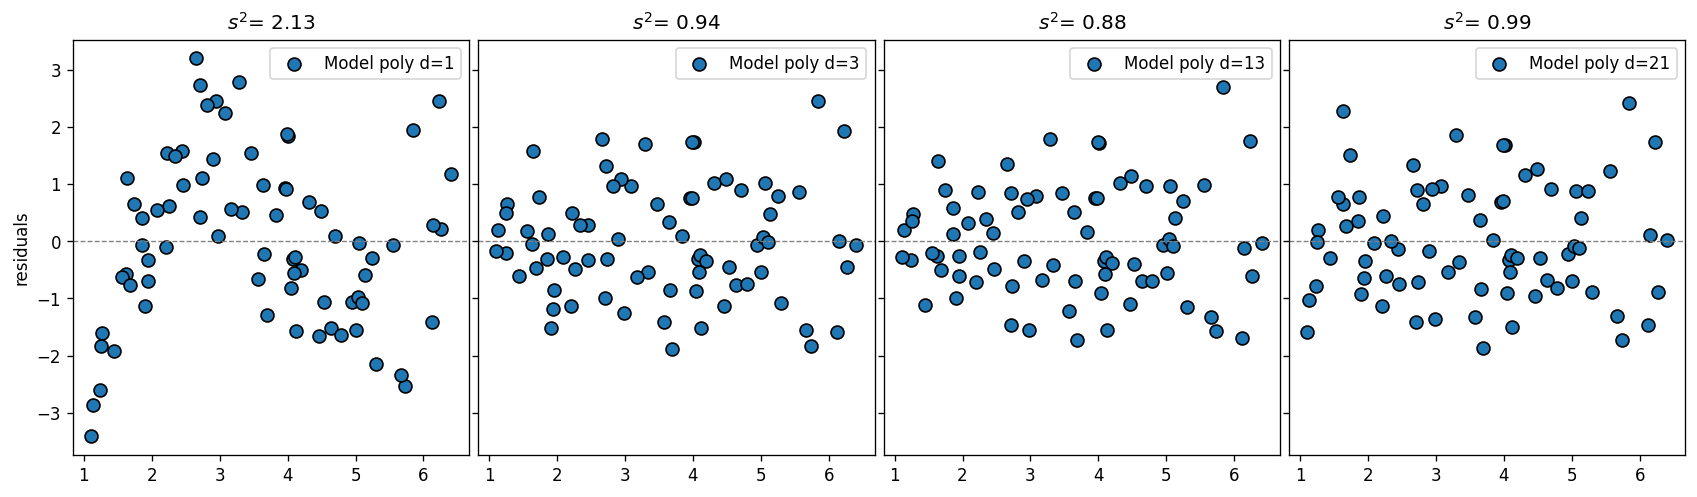

In [8]:
def plot_residuals(model, X, y, label=None, ax=None):
    residuals = y - model.predict(X)
    ax.axhline(0, ls="--", c="grey", lw=0.8)
    ax.scatter(X, residuals, ec="k", s=60, label=label)
    ax.set_title(f"$s^2$={residuals.var(): .2f}")
    
    
    ax.legend()

fig, axes = plt.subplots(1, 4, figsize=(14, 4), dpi=120, sharey=True)
for i in range(len(models)):
    plot_residuals(models[i], X_train, y_train, label=model_labels[i], ax=axes[i])

axes[0].set_ylabel("residuals")
plt.tight_layout(pad=0.2)

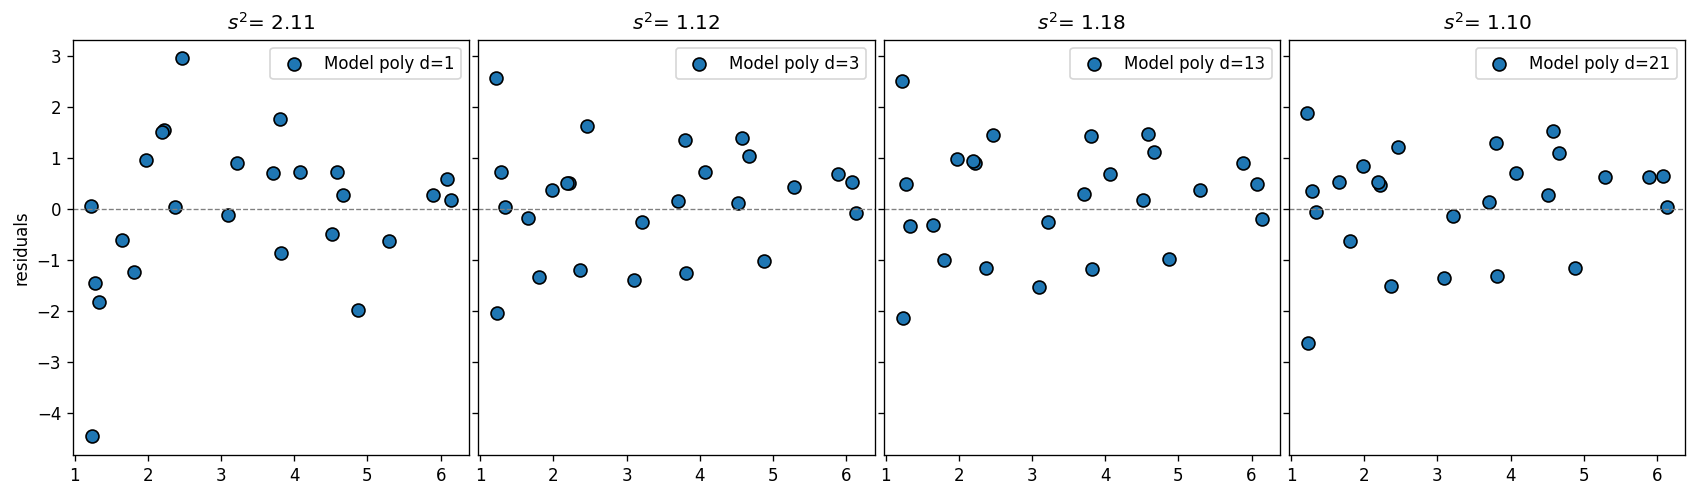

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4), dpi=120, sharey=True)
for i in range(len(models)):
    plot_residuals(models[i], X_test, y_test, label=model_labels[i], ax=axes[i])

axes[0].set_ylabel("residuals")
plt.tight_layout(pad=0.2)


In [10]:
X_new = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5]).reshape(-1, 1)
y_new = f(X_new)

model_trials = []
from sklearn.metrics import mean_squared_error, r2_score

for k in range(len(model_degrees)):
    
    trials = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            train_size=0.75, 
                                                            random_state=2020 + i)
        
        model = make_pipeline(PolynomialFeatures(model_degrees[k]), LinearRegression())
        model.fit(X_train, y_train)
        
        pred_train = model.predict(X_train)
        pred_test  = model.predict(X_test)
        trials.append(dict(model=model, 
                           X_train=X_train, 
                           X_test=X_test, 
                           y_train=y_train, 
                           y_test=y_test,
                           train_score=r2_score(y_train, pred_train),
                           test_score=r2_score(y_test, pred_test),
                           train_mse=mean_squared_error(y_train, pred_train),
                           test_mse=mean_squared_error(y_test, pred_test),
                          ))
    
    model_trials.append(trials)

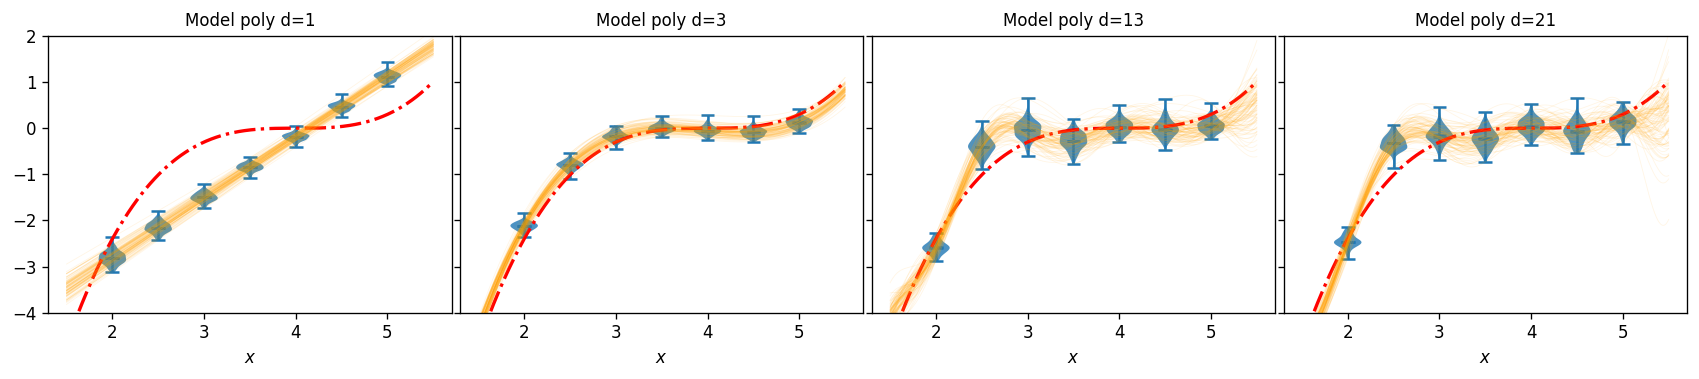

In [579]:
def plot_predictions(trials, X, y, eps=0.5, ax=None):
    preds = []
    for trial in trials:
        preds.append(trial["model"].predict(X))
    preds = np.vstack(preds)
    preds = [preds[:, i] for i in range(preds.shape[1])]
    
    xx = np.linspace(X.min() - eps, X.max() + eps, num=500).reshape(-1, 1)

    ax.plot(xx, f(xx), c="red", ls="-.", lw=2, label="Reality")
    for trial in trials:
        ax.plot(xx, trial["model"].predict(xx), c="orange", lw=0.5, alpha=0.1)
    
    
    parts = ax.violinplot(preds, X.ravel(), points=70, widths=0.3,
                          showmeans=True, showextrema=True, showmedians=True)
    for pc in parts['bodies']:
        pc.set_alpha(0.8)
    ax.set_xlabel("$x$")
    ax.set_title(model_labels[i], fontsize=10)

fig, axes = plt.subplots(1, 4, figsize=(14, 3), dpi=120, sharey=True)
for i in range(len(model_trials)):
    plot_predictions(model_trials[i], X_new, f(X_new), ax=axes[i])
    
    
plt.tight_layout(pad=0.15)
plt.ylim(-4, 2);
    

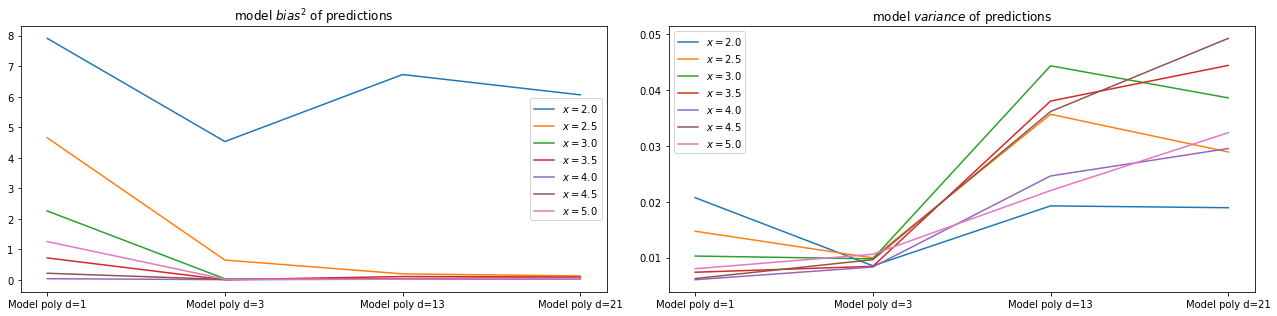

In [610]:
model_bias = []
model_vars = []
for i in range(len(model_trials)):
    trails = model_trials[i]
    preds = np.vstack([t["model"].predict(X_new) for t in model_trials[i]])
    residuals = preds - y_new.ravel()
    model_bias.append(np.average(preds**2, axis=0))
    model_vars.append(preds.var(axis=0))

model_bias = np.vstack(model_bias)
model_vars = np.vstack(model_vars)


fig, axes = plt.subplots(1,2, figsize=(18, 4.5))


for i in range(X_new.shape[0]):
    axes[0].plot(range(4), model_bias[:, i], label=f"$x={X_new[i][0]}$")
    axes[1].plot(range(4), model_vars[:, i], label=f"$x={X_new[i][0]}$")
    
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("model $bias^2$ of predictions")
    axes[1].set_title("model $variance$ of predictions")
    axes[0].set_xticks(range(4))
    axes[0].set_xticklabels(model_labels)
    axes[1].set_xticks(range(4))
    axes[1].set_xticklabels(model_labels)    
plt.tight_layout()

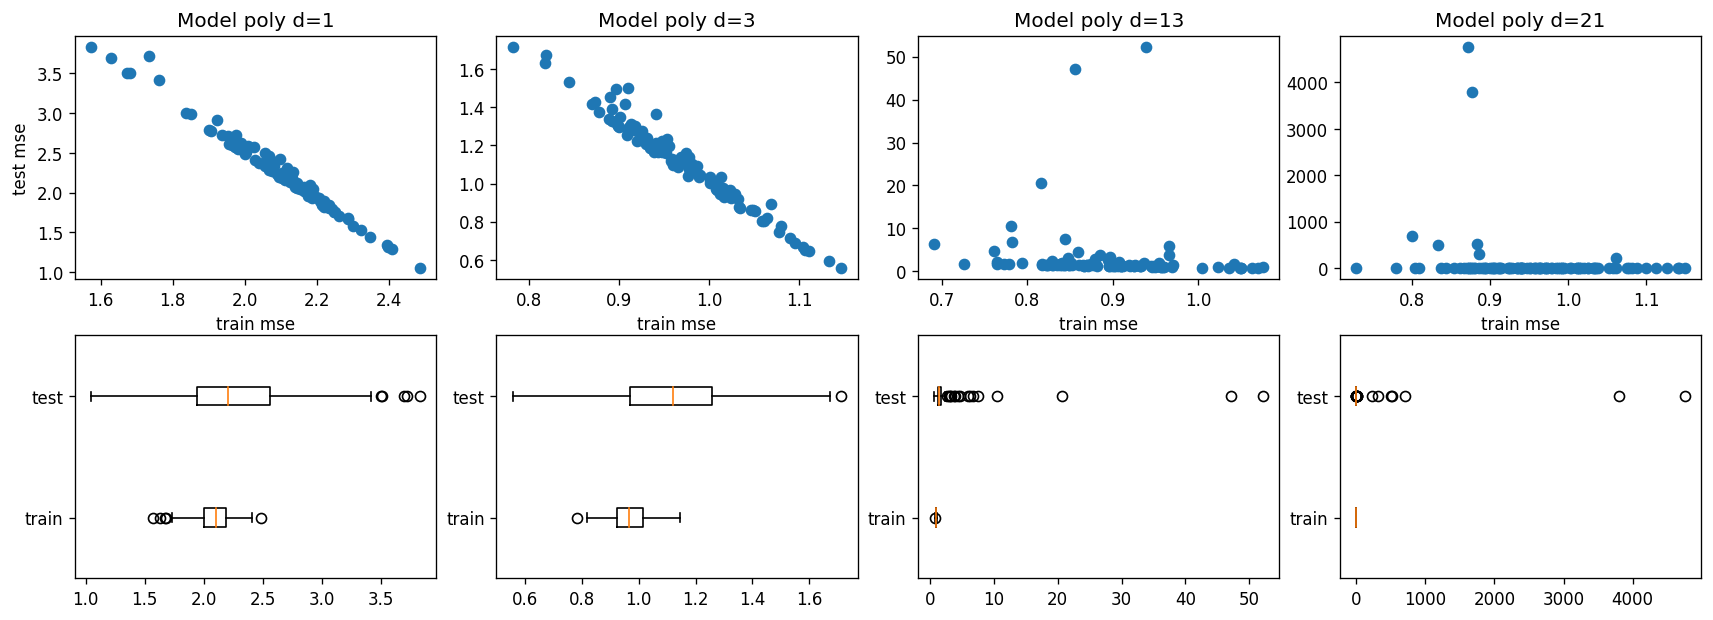

In [495]:
from sklearn.metrics import r2_score

def plot_score(trials, eps=0.5, ax=None):
    
    scores = []
    for trial in trials:
        scores.append(np.array([trial["train_mse"], trial["test_mse"]]))
    scores = np.vstack(scores)
    
    ax.scatter(scores[:, 0], scores[:,1])
    ax.set_xlabel("train mse")

def plot_score2(trials, eps=0.5, ax=None):
    
    scores = []
    for trial in trials:
        scores.append(np.array([trial["train_mse"], trial["test_mse"]]))
    scores = np.vstack(scores)
    
    ax.boxplot([scores[:, 0], scores[:,1]], vert=False, labels=["train", "test"])
#     ax.set_xlabel("train mse")

    
fig, axes = plt.subplots(2, 4, figsize=(14, 5), dpi=120)
for i in range(len(model_trials)):
    plot_score(model_trials[i], ax=axes[0][i])
    axes[0][i].set_title(model_labels[i])
axes[0][0].set_ylabel("test mse")

for i in range(len(model_trials)):
    plot_score2(model_trials[i], ax=axes[1][i])

plt.tight_layout(pad=0.1)

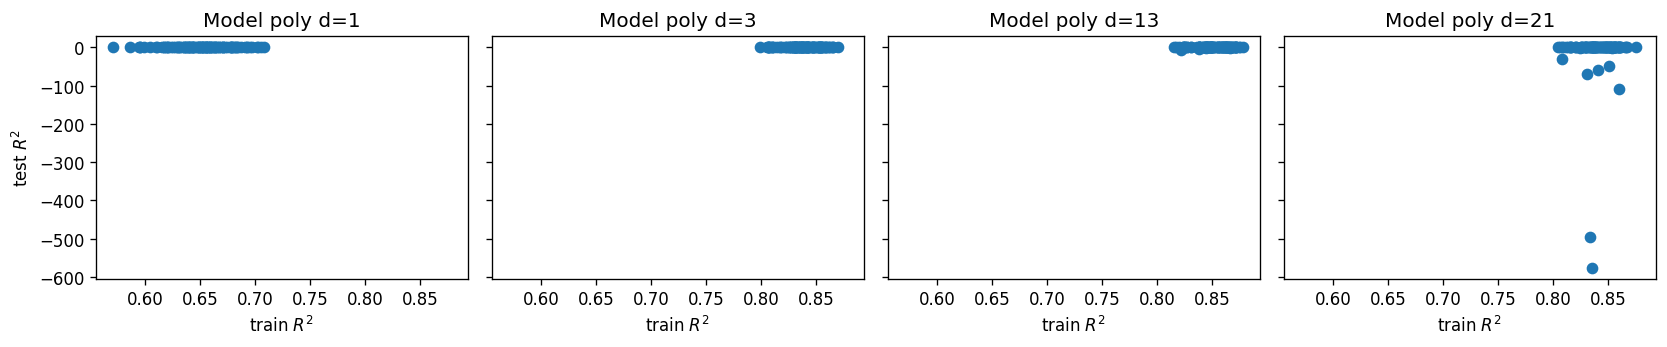

In [478]:
from sklearn.metrics import r2_score

def plot_accuracy(trials, eps=0.5, ax=None):
    
    scores = []
    for trial in trials:
        X_train, y_train = trial["X_train"], trial["y_train"]
        X_test, y_test = trial["X_test"], trial["y_test"]
        model = trial["model"]
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        scores.append(np.array([r2_score(y_train, pred_train), 
                                r2_score(y_test, pred_test)]))
    scores = np.vstack(scores)
    
    ax.scatter(scores[:, 0], scores[:,1])
    ax.set_xlabel("train $R^2$")

    
fig, axes = plt.subplots(1, 4, figsize=(14, 3), sharey=True, sharex=True, dpi=120)
for i in range(len(model_trials)):
    plot_accuracy(model_trials[i], ax=axes[i])
    axes[i].set_title(model_labels[i])
axes[0].set_ylabel("test $R^2$")

plt.tight_layout()

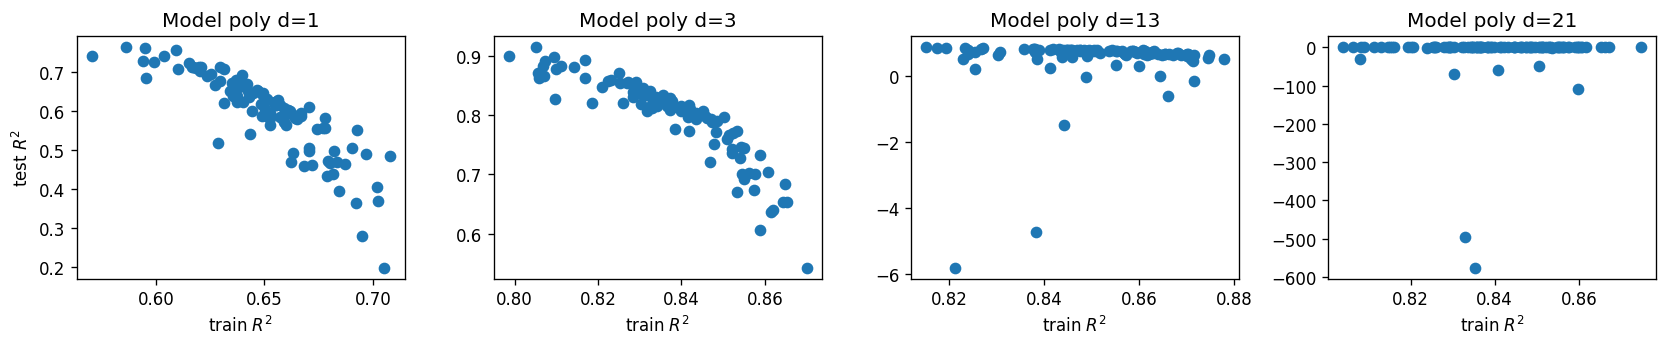

In [479]:
fig, axes = plt.subplots(1, 4, figsize=(14, 3), sharey=False, sharex=False, dpi=120)
for i in range(len(model_trials)):
    plot_accuracy(model_trials[i], ax=axes[i])
    axes[i].set_title(model_labels[i])
axes[0].set_ylabel("test $R^2$")

plt.tight_layout()

### 案例2

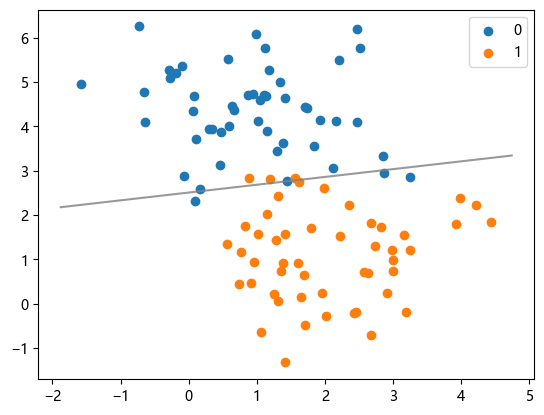

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0, centers=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[y==0, 0], X[y==0, 1], label='0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# 绘制Logistic回归得分割线
w, b = logreg.coef_[0], logreg.intercept_[0]
xx = np.linspace(*plt.xlim())
yy = (-w[0] * xx - b) / w[1]

plt.plot(xx, yy, '-', c='gray', alpha=0.8)
plt.legend();

In [5]:
X_train.shape

(75, 2)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


score_test = []
score_train = []

coefs = []
intercepts = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020+i)
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
    logreg.fit(X_train, y_train)

    score = accuracy_score(y_train, logreg.predict(X_train))
    score_train.append(score)
    
    score = accuracy_score(y_test, logreg.predict(X_test))
    score_test.append(score)
    
    coefs.append(logreg.coef_[0])
    intercepts.append(logreg.intercept_[0])
    
coefs = np.array(coefs)
intercepts = np.array(intercepts)

同模型下，因样本抽样产生的性能不确定性

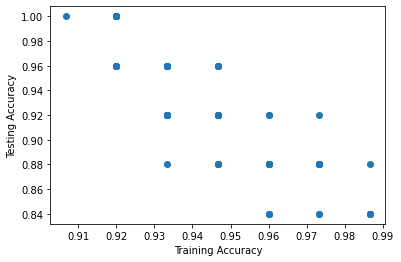

In [9]:
plt.scatter(score_train, score_test)
plt.xlabel("Training Accuracy"); plt.ylabel("Testing Accuracy");

模型参数得不确定性

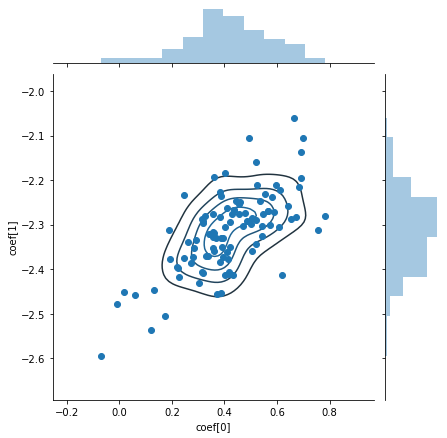

In [26]:
import seaborn as sns

g = sns.jointplot(coefs[:,0], coefs[:,1])
g.plot_joint(sns.kdeplot, zorder=0, n_levels=4)
g.set_axis_labels("coef[0]", "coef[1]");



绘制每次划分拟合的分割线

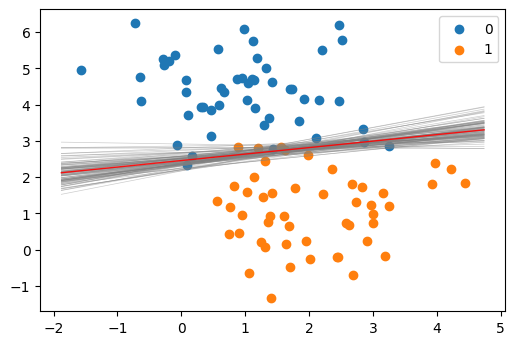

In [29]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(X[y==0, 0], X[y==0, 1], label='0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')

xx = np.linspace(*plt.xlim())
for w, b in zip(coefs, intercepts):
    yy = (-w[0] * xx - b) / w[1]
    plt.plot(xx, yy, '-', c='gray', alpha=0.4,  linewidth=0.5)

yy = (-coefs[:,0].mean() * xx - intercepts.mean()) / coefs[:, 1].mean()
plt.plot(xx, yy, '-', c='red', alpha=0.9,  linewidth=1)


plt.legend();

## 训练集与测试集

> 不要刻意去寻找训练集误差为零的模型，因为，数据原本就有随机噪音，而且我们也不知道“真实”是什么。

固定训练样本，改变模型的描述能力（模型复杂度）。不难理解，随着模型复杂度的增加，其描述能力也就会增加；此时，模型在验证集上的表现，偏差会倾向于减小而方差会倾向于增大。而在相反方向，随着模型复杂度的降低，其描述能力也就会降低；此时，模型在验证集上的表现，偏差会倾向于增大而方差会倾向于减小。

若模型复杂度大于平衡点，则模型的方差会偏高，模型倾向于过拟合；若模型复杂度小于平衡点，则模型的偏差会偏高，模型倾向于过拟合。
<center>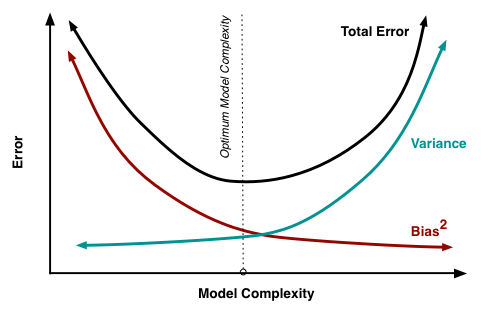</center>

<br><br><br>
<center>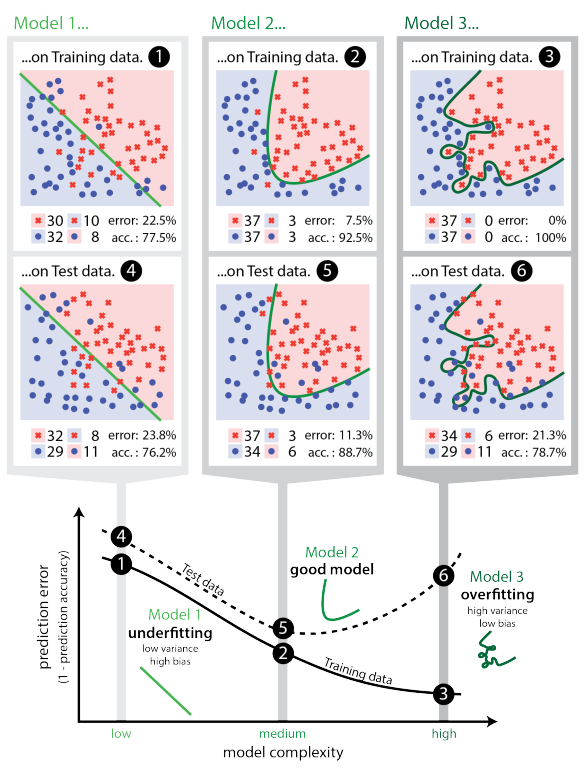</center>


<br><br><br>
在现实中，我们是很难计算模型的偏差与方差，尤其偏差的计算需要“真实值”。因此，在日常工程中，我们是无法通过偏差与方差判断模型的拟合情况：是欠拟合，还是过拟合。

将数据集分为“独立”的两部分，训练数据集和测试数据集。对于训练数据集，理论上，模型复杂度的增加，就会获得在训练集上误差的降低。当模型复杂读增大到一定程度，模型会将训练集的某些“噪音”当作“真实”数据进行学习，这些在训练集中被当作真实的“噪音”但在测试集或许并不“真实”，这部分也就成为“测试集”的“新”误差，导致测试集误差的增高。

* 当模型处于欠拟合状态时，训练集和验证集上的误差都很高；
* 当模型处于过拟合状态时，训练集上的误差低，而验证集上的误差会非常高。

<center>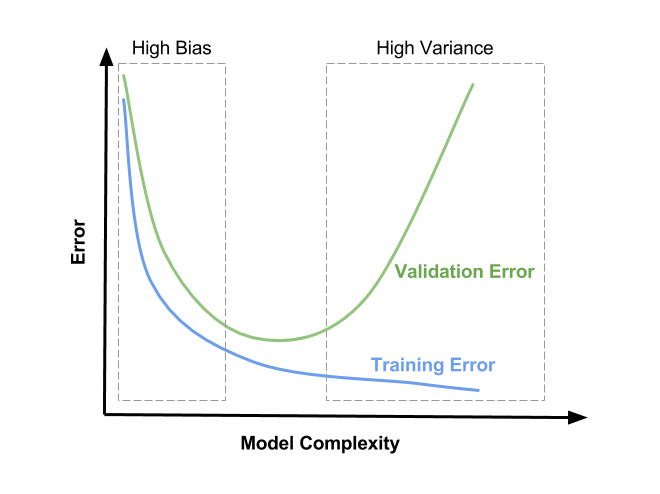</center>






当数据样本增多时，也会导致平衡点向“模型复杂”一面发展
<TABLE style="width: 80em"><TR style="background:white">
    <TD>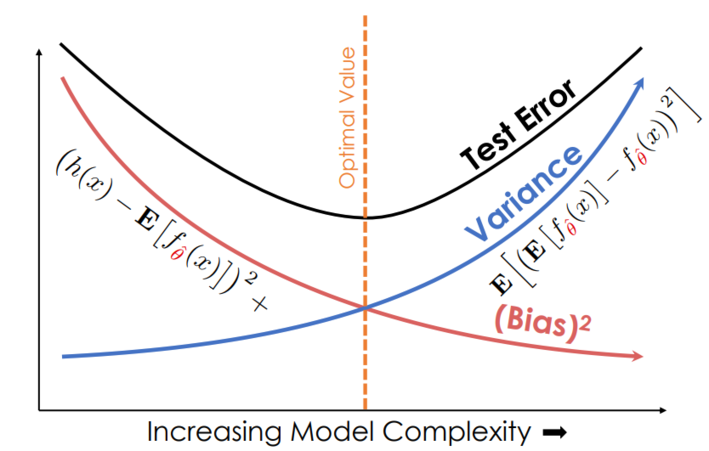</TD>
    <TD>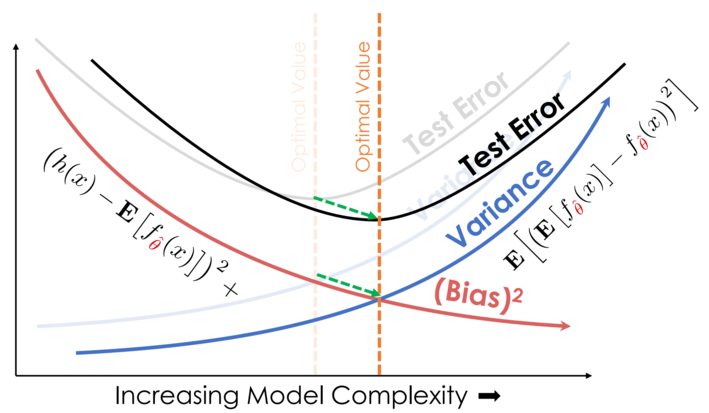</TD>
</TR></TABLE>

<br><br>
<center>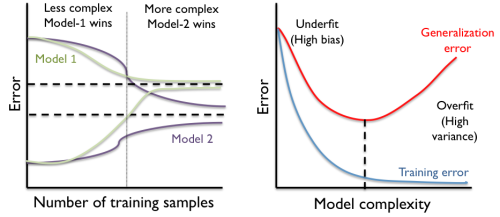</center>


<br><br>
<center>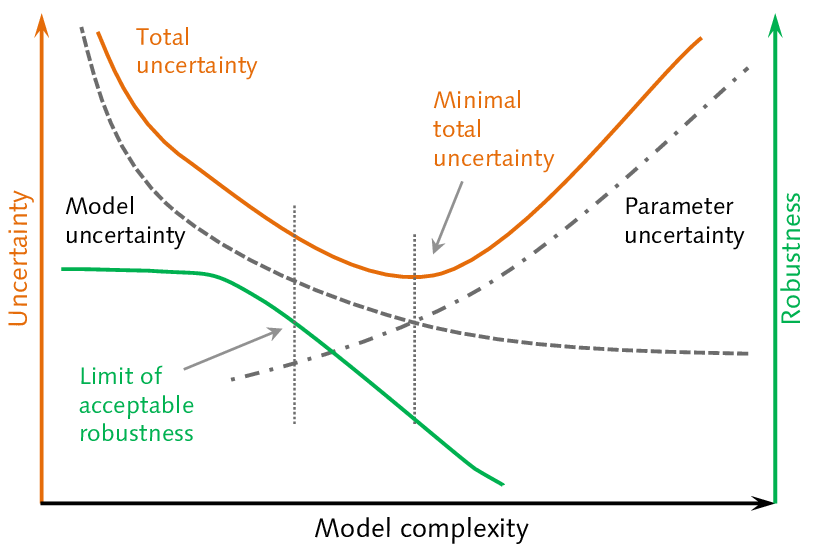</center>



#### 欠拟合和过拟合处理措施

当模型处于欠拟合状态时，根本的办法是增加模型复杂度。我们一般有以下一些办法：

* 增加模型的迭代次数；
* 更换描述能力更强的模型；
* 生成更多特征供训练使用；
* 降低正则化水平。

当模型处于过拟合状态时，根本的办法是降低模型复杂度。我们则有以下一些武器：

* 扩增训练集；
* 减少训练使用的特征的数量；
* 提高正则化水平。